In [21]:
pwd


'/Users/cto/Documents/stirling/ITNPBD4'

In [23]:
ls

ITNPBD4-Week3.ipynb  Week 3 Data.csv


In [29]:
ls


ITNPBD4-Week3.ipynb  Week 3 Data.csv


In [81]:
df = pd.read_csv('Data.csv')


In [37]:
ls

ITNPBD4-Week3.ipynb  Week 3 Data.csv


In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


<module 'pandas' from '/opt/anaconda3/lib/python3.12/site-packages/pandas/__init__.py'>

In [67]:
df = pd.read_csv('Data.csv')

In [69]:
display(df)

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0.254167,0.652917,0.350133,2114,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
713,0.253333,0.590000,0.155471,3095,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
714,0.253333,0.752917,0.124383,1341,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
715,0.255833,0.483333,0.350754,1796,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [91]:
print(df.head())

       temp       hum  windspeed   cnt  season_1  season_2  season_3  \
0  0.344167  0.805833   0.160446   985         1         0         0   
1  0.363478  0.696087   0.248539   801         1         0         0   
2  0.196364  0.437273   0.248309  1349         1         0         0   
3  0.200000  0.590435   0.160296  1562         1         0         0   
4  0.226957  0.436957   0.186900  1600         1         0         0   

   season_4  yr_0  yr_1  ...  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  \
0         0     1     0  ...       0       0       0       0       0   
1         0     1     0  ...       0       0       0       0       0   
2         0     1     0  ...       0       0       0       0       0   
3         0     1     0  ...       0       0       0       0       0   
4         0     1     0  ...       0       0       0       0       0   

   weathersit_1  weathersit_2  weathersit_3  holiday_0  holiday_1  
0             0             1             0          1          0 

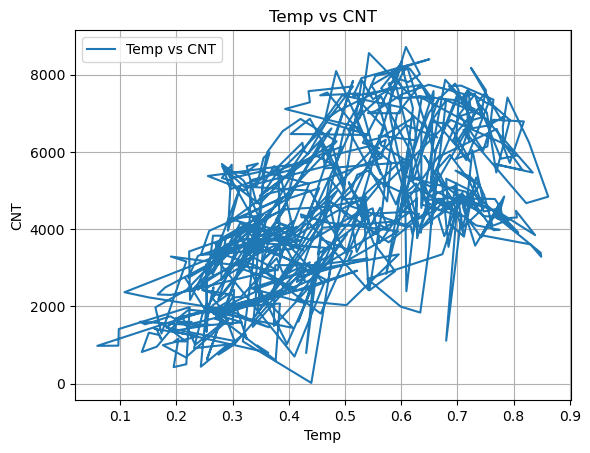

In [97]:
plt.plot(df['temp'], df['cnt'], label='Temp vs CNT')
plt.title('Temp vs CNT')
plt.xlabel('Temp')
plt.ylabel('CNT')
plt.grid(True)
plt.legend()
plt.show()

In [104]:
y = df['cnt']
X = df.drop('cnt', axis=1)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

         temp       hum  windspeed  season_1  season_2  season_3  season_4  \
0    0.344167  0.805833   0.160446         1         0         0         0   
1    0.363478  0.696087   0.248539         1         0         0         0   
2    0.196364  0.437273   0.248309         1         0         0         0   
3    0.200000  0.590435   0.160296         1         0         0         0   
4    0.226957  0.436957   0.186900         1         0         0         0   
..        ...       ...        ...       ...       ...       ...       ...   
712  0.254167  0.652917   0.350133         1         0         0         0   
713  0.253333  0.590000   0.155471         1         0         0         0   
714  0.253333  0.752917   0.124383         1         0         0         0   
715  0.255833  0.483333   0.350754         1         0         0         0   
716  0.215833  0.577500   0.154846         1         0         0         0   

     yr_0  yr_1  mnth_1  ...  mnth_5  mnth_6  mnth_7  mnth_8  m

In [110]:
model = LinearRegression()

In [114]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)
y_pred


array([3904., 3120., 1392., 6320., 7248., 7104., 1696., 6432., 2560.,
       1408., 5648., 2288., 4720., 4592., 4928., 4256., 4752., 6288.,
       2528., 6608., 1728., 4592., 4016., 6944., 4576., 3056., 2992.,
       2944., -544., 4176., -208., 2416., 4352., 5392., 4160., 3744.,
       3872., 6896., 4336., 6640., 4080., 6400., 6560., 3696., 4064.,
        520., 2640., 6336., 3440., 5424., 3680., 3936., 6720.,  560.,
       4832., 6672., 1520., 3600., 6256., 5904., 1504., 3304.,  112.,
       5936., 5088., 7072., 3728.,  736., 6048., 5440., 6048., 5440.,
       6128., 3920., 3504., 3648., 4576., 9056., 2672., 5680., 6496.,
       8688., 1056., 3776., 6000., 6368., 3120., 4976., 6592., 1808.,
       4864., 3520., 3360., 3728., 3072., 1712., 4400., 5280., 5088.,
        928., 5632., 2880., 5008., 3568., 6208., 3616., 6672., 4064.,
       -848., 6448., 5072., 3488., 5952., 3104., 6880., 2384., 5056.,
       1488., 3472., 5536., 1488., 1968., 4848., 2592., 4288., 3344.,
       5120., 3264.,

In [126]:
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 65.9321111884429


In [130]:
accuracy = 100 - mape
accuracy

34.0678888115571

In [136]:
r2 = r2_score(y_test, y_pred)
r2

0.7510819055072472